In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [11]:
# Step 1: Load the dataset and define k = 5
url = "https://raw.githubusercontent.com/jvnthny-espiritu/ml-courseworks/main/k-means-activity/dataset/penguins.csv"
df = pd.read_csv(url)
df.dropna(inplace=True)

In [12]:
# Step 2: Select relevant features for clustering
selected_features = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm"]
df_selected = df[selected_features]

In [13]:
# Step 3: Sample 100 random data points
df_sample = df_selected.sample(n=100, random_state=42).reset_index(drop=True)

In [14]:
# Step 4: Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sample)

In [15]:
# Step 5: Implementing K-Means Clustering from scratch
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def kmeans(X, k, max_iters=100, tol=1e-4):
    np.random.seed(42)
    centroids = X[np.random.choice(len(X), k, replace=False)]  # Step 2: Initialize centroids randomly

    for _ in range(max_iters):
        # Step 3: Assign points to the nearest centroid
        clusters = np.array([np.argmin([euclidean_distance(x, c) for c in centroids]) for x in X])

        # Step 4: Compute new centroids
        new_centroids = np.array([X[clusters == j].mean(axis=0) for j in range(k)])

        # Check for convergence
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids

    return clusters, centroids

In [16]:
# Step 6: Use the Elbow Method to find the optimal k
inertia_values = []
k_range = range(1, 10)
for k in k_range:
    clusters, centroids = kmeans(X_scaled, k)
    inertia = sum(np.min([euclidean_distance(x, c) for c in centroids]) for x in X_scaled)
    inertia_values.append(inertia)

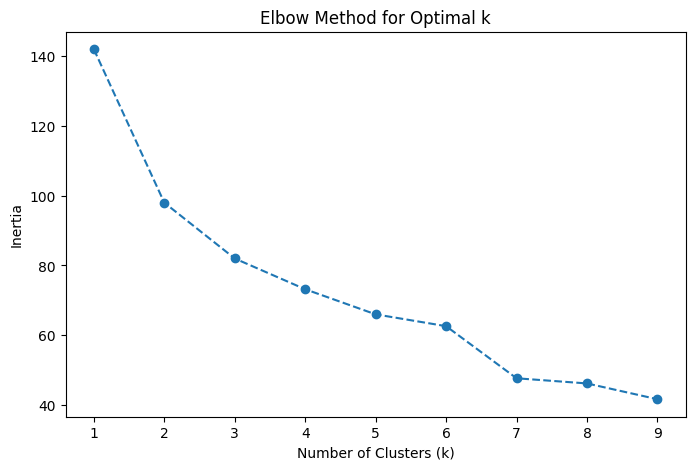

In [17]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [18]:
# Step 7: Apply the K-Means algorithm
k = 5
clusters, centroids = kmeans(X_scaled, k)
df_sample['cluster'] = clusters

In [19]:
# Step 8: Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_sample['pca1'] = X_pca[:, 0]
df_sample['pca2'] = X_pca[:, 1]
centroids_pca = pca.transform(centroids)  # Transform centroids to PCA space

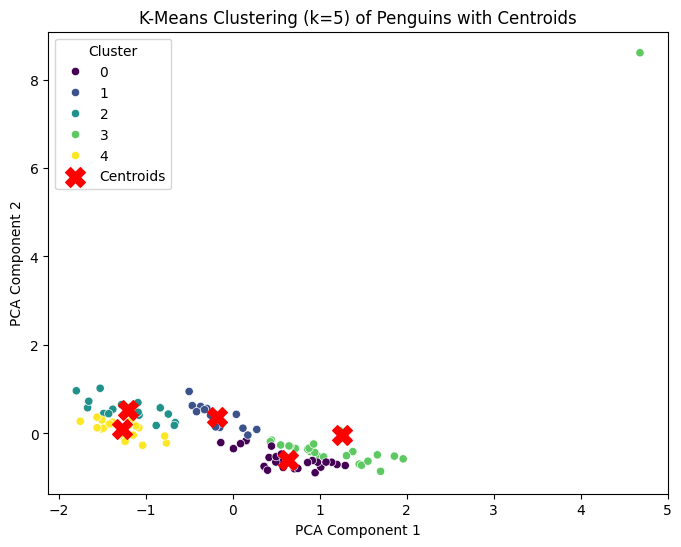

In [20]:
# Step 9: Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca1', y='pca2', hue=df_sample['cluster'], palette='viridis', data=df_sample)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering (k=5) of Penguins with Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()